In [ ]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


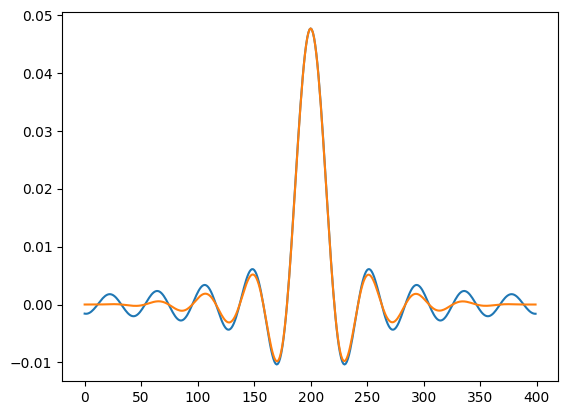

In [ ]:
omega_c = 0.15
N = 200
M = 50

h = np.array([omega_c / np.pi if n == 0 else np.sin(omega_c*n)/(np.pi*n) for n in range(-N, N)])
plt.plot(h)
w = np.array([1 if np.abs(n) < M else 0 for n in range(-N, N)])
w_h = np.hamming(2*N)
w_k = np.kaiser(2*N, 14)
w_hn= np.hanning(2*N)
h_d = h*w_k
plt.plot(h_d)

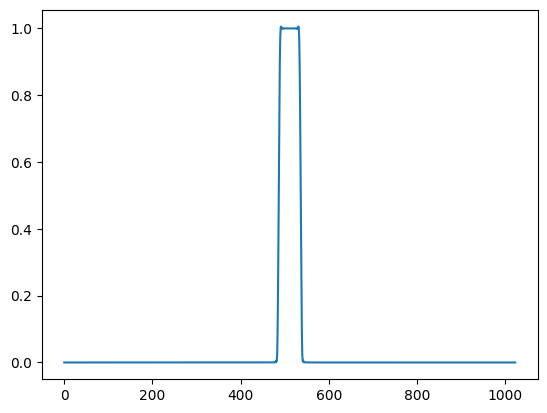

In [ ]:
freq = np.abs(sp.signal.freqz(h_d)[1])
freq = np.array(list(freq[::-1]) + list(freq))

plt.plot(freq)

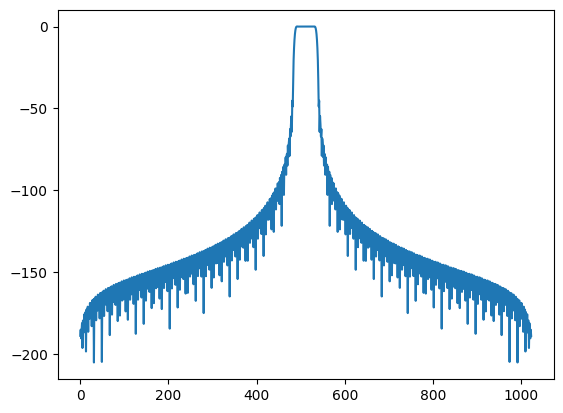

In [ ]:
plt.plot(20*np.log10(freq))

In [ ]:
# overlap add

def circular_convolution(x, h):
  L1 = len(x)
  L2 = len(h)
  def x_(n):
    if n >= 0 and n < len(x):
      return x[n]
    else:
      return 0

  def h_(n):
    if n >= 0 and n < len(h):
      return h[n]
    else:
      return 0

  N = max(L1,L2)
  l = N
  y = [0 for i in range(l)]
  for i in range(l):
    y[i] = sum(x_(k)*h_((i-k) % N) for k in range(N))
  return y

def concatenate_with_overlap_addition(x1,x2,n):
  '''
  x1 = first list
  x2 = second list
  n = degree of overlap
  '''
  L = len(x1) + len(x2) - n
  x1_ = x1 + [0 for i in range(L - len(x1))]
  x2_ = [0 for i in range(L - len(x2))] + x2
  return [e1 + e2 for (e1,e2) in zip(x1_,x2_)]

def overlap_add(x,h, N):
  '''
  assumes len(x) >>> len(h)
  N = block length
  '''
  y_len = len(x) + len(h) - 1
  M = len(h)
  L = N - M + 1
#  print(f"{L=}")
  X = [x[i*L:(i+1)*L] for i in range(int(len(x) / L) + 1)]
  for x in X:
    while len(x) < N:
      x.append(0)
#  print(f"{X=}")
  Y = [circular_convolution(x,h) for x in X]
#  print(f"{Y=}")
  y = Y[0]
  for y_ in Y[1:]:
    y = concatenate_with_overlap_addition(y,y_,M-1)

  return y[:y_len]



In [ ]:
data=sp.io.wavfile.read('sample-6s.wav', mmap=False)[1]
data = np.transpose(np.transpose(data)[0])

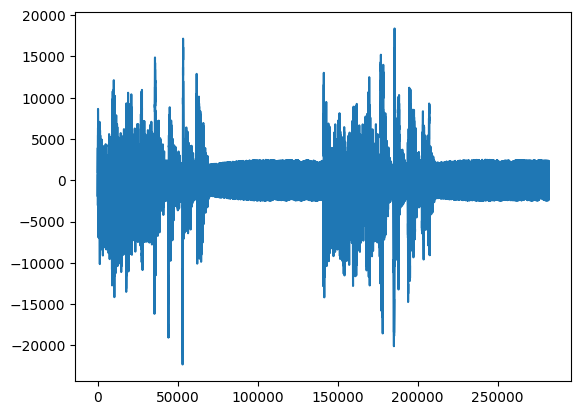

In [ ]:
plt.plot(data)

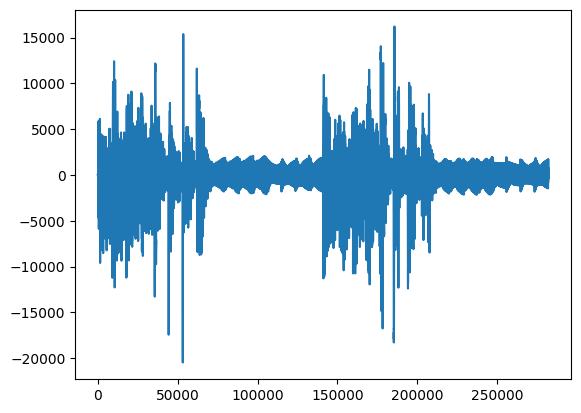

In [ ]:
filtered = np.convolve(data, h_d)
plt.plot(filtered)
plt.plot(20*np.log(np.abs(sp.signal.freqz(data)[1])))
plt.plot(20*np.log(np.abs(sp.signal.freqz(filtered)[1])))

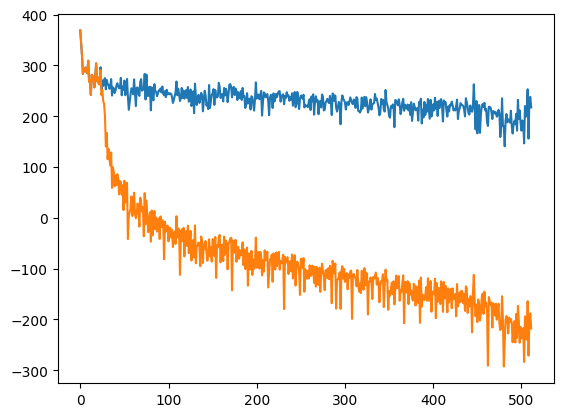

In [ ]:
plt.plot(20*np.log(np.abs(sp.signal.freqz(data)[1])))
plt.plot(20*np.log(np.abs(sp.signal.freqz(filtered)[1])))